In [1]:
import pandas as pd
import numpy as np
import os
import pylab as pl
import statsmodels.formula.api as smf
from math import log
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
dfaccidents=pd.read_csv('https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df311street=pd.read_csv('311street.csv')
df311traffic=pd.read_csv('311traffic.csv')

In [4]:
dfaccidents.columns
dfacc=dfaccidents.drop(['BOROUGH','ZIP CODE','ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME','LOCATION','NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'UNIQUE KEY', u'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],axis=1)

In [5]:
dfacc=dfacc[dfacc.DATE.str.contains("2016") == True]

In [6]:
dfacc=dfacc.dropna(axis=0, how='any')

In [7]:
dfacc=dfacc.reset_index()
dfacc=dfacc.drop(['index'],axis=1)

In [8]:
dfacc['Location']=dfacc['LATITUDE'].astype(str)+','+dfacc['LONGITUDE'].astype(str)

In [9]:
location=[]
for i in range(0,len(dfacc)):
    location.append(dfacc['LATITUDE'][i].astype(str)[:7]+','+dfacc['LONGITUDE'][i].astype(str)[:8])

In [10]:
dflocacc=pd.DataFrame(location,columns=['Location'])

In [11]:
dfacc['Location']=dflocacc

In [12]:
dfacc.head()

,DATE,TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,Location
0,12/29/2016,0:00,40.844107,-73.897997,0,0,"40.8441,-73.8979"
1,12/23/2016,0:30,40.835091,-73.825371,1,0,"40.8350,-73.8253"
2,12/10/2016,3:38,40.851690,-73.952371,0,0,"40.8516,-73.9523"
3,11/30/2016,22:50,40.755480,-73.741730,1,0,"40.7554,-73.7417"
4,11/23/2016,20:11,40.771122,-73.869635,0,0,"40.7711,-73.8696"


In [13]:
location=[]
for i in range(0,len(df311street)):
    location.append(df311street['Latitude'][i].astype(str)[:7]+','+df311street['Longitude'][i].astype(str)[:8])

In [14]:
dfloc=pd.DataFrame(location,columns=['Location'])

In [15]:
df311street['Location']=dfloc

In [16]:
df311street=df311street.rename(index=str, columns={"Complaint Type": "Complaint"})

In [17]:
df311stcond=df311street[df311street.Complaint=='Street Condition']

In [18]:
df311stcond=df311stcond.reset_index()
df311stcond=df311stcond.drop(['index'],axis=1)

In [19]:
df311stcond.head()

,Unique Key,Created Date,Agency,Complaint,Incident Zip,Latitude,Longitude,Location
0,32305924,1/1/16 0:24,DOT,Street Condition,10029.0,40.792335,-73.944102,"40.7923,-73.9441"
1,32308333,1/1/16 0:31,DOT,Street Condition,11219.0,40.632134,-73.995122,"40.6321,-73.9951"
2,32308181,1/1/16 3:02,DOT,Street Condition,11378.0,40.720578,-73.922232,"40.7205,-73.9222"
3,32313466,1/1/16 3:37,DOT,Street Condition,11354.0,40.762954,-73.831957,"40.7629,-73.8319"
4,32311437,1/1/16 7:58,DOT,Street Condition,11201.0,40.688223,-73.988137,"40.6882,-73.9881"


In [20]:
freqst=pd.DataFrame(df311street.groupby(['Location']).size())

In [21]:
freqst=freqst.reset_index()

In [22]:
freqst=freqst.rename(index=str, columns={0: "Frequency_st_con"})

In [23]:
freqacc=pd.DataFrame(dfacc.groupby(['Location']).size())

In [24]:
freqacc=freqacc.reset_index()

In [25]:
freqacc=freqacc.rename(index=str, columns={0: "FrequencyAcc"})

In [26]:
freqacc=freqacc[1:]

In [27]:
dfmerge= pd.merge(freqacc, freqst, on='Location', how='inner')

In [28]:
dfmerge.head()

,Location,FrequencyAcc,Frequency_st_con
0,"40.5000,-74.2390",1,3
1,"40.5007,-74.2488",1,1
2,"40.5023,-74.2407",1,1
3,"40.5031,-74.2400",1,1
4,"40.5041,-74.2452",1,2


In [29]:
dfmerge['Abs']=dfmerge['FrequencyAcc']+dfmerge['Frequency_st_con']

In [30]:
dfpareto=dfmerge.sort(['Abs'],ascending=False)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [31]:
dfpareto['AbsFreq']=(dfpareto['Abs']/dfpareto['Abs'].sum())*100

In [32]:
dfpareto=dfpareto.reset_index()
dfpareto=dfpareto.drop(['index'],axis=1)

In [33]:
dfpareto.head()

,Location,FrequencyAcc,Frequency_st_con,Abs,AbsFreq
0,"40.6960,-73.9845",114,18,132,0.086160
1,"40.8201,-73.8906",105,20,125,0.081591
2,"40.7606,-73.9643",88,10,98,0.063967
3,"40.7334,-73.8703",75,18,93,0.060704
4,"40.6585,-73.8906",65,28,93,0.060704


In [34]:
relfreq=[]

In [35]:
relfreq.append(dfpareto['AbsFreq'][0])

In [36]:
count=dfpareto['AbsFreq'][0]
for i in range(1,len(dfpareto)):
    count+=dfpareto['AbsFreq'][i]
    relfreq.append(count)

In [37]:
relfreq=pd.DataFrame(relfreq,columns=['RelFreq'])

In [38]:
dfpareto['RelFreq']=relfreq

In [39]:
df80=dfpareto[dfpareto.RelFreq<80]

In [40]:
df80.head()

,Location,FrequencyAcc,Frequency_st_con,Abs,AbsFreq,RelFreq
0,"40.6960,-73.9845",114,18,132,0.086160,0.086160
1,"40.8201,-73.8906",105,20,125,0.081591,0.167751
2,"40.7606,-73.9643",88,10,98,0.063967,0.231719
3,"40.7334,-73.8703",75,18,93,0.060704,0.292422
4,"40.6585,-73.8906",65,28,93,0.060704,0.353126


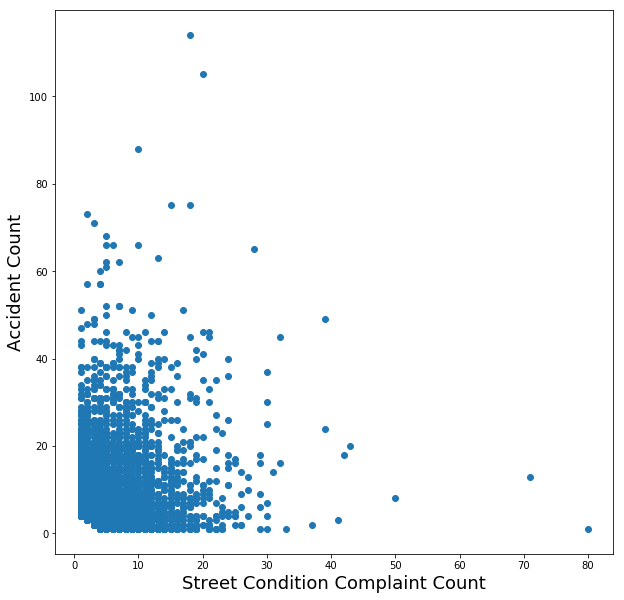

In [41]:
pl.figure(figsize=(10, 10))
pl.plot(df80['Frequency_st_con'],df80['FrequencyAcc'],'o')
pl.ylabel('Accident Count', fontsize = 18)
pl.xlabel('Street Condition Complaint Count', fontsize = 18)

In [42]:
log_FreqAcc=[]
log_Freq_st_con=[]
for i in range(0,len(dfpareto)):
    log_FreqAcc.append(log(dfpareto['FrequencyAcc'][i]))
    log_Freq_st_con.append(log(dfpareto['Frequency_st_con'][i]))

In [43]:
x=log_FreqAcc
y=log_Freq_st_con
dflog=pd.DataFrame({'FrequencyAcc':x,'Frequency_st_con': y},columns = ['FrequencyAcc','Frequency_st_con'])

In [44]:
dflog.head()

,FrequencyAcc,Frequency_st_con
0,4.736198,2.890372
1,4.653960,2.995732
2,4.477337,2.302585
3,4.317488,2.890372
4,4.174387,3.332205


In [45]:
ols3=smf.ols('FrequencyAcc ~  Frequency_st_con-1',dflog).fit()
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FrequencyAcc   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 1.784e+04
Date:                Tue, 10 Oct 2017   Prob (F-statistic):               0.00
Time:                        01:04:27   Log-Likelihood:                -29268.
No. Observations:               21820   AIC:                         5.854e+04
Df Residuals:                   21819   BIC:                         5.855e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Frequency_st_con     0.7447      0.006    133.563      0.000         0.734     0.756
==============================================================================
Omnibus:                      552.279   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.412
Skew:                           0.400   Prob(JB):                    8.41e-130
Kurtosis:                       3.118   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

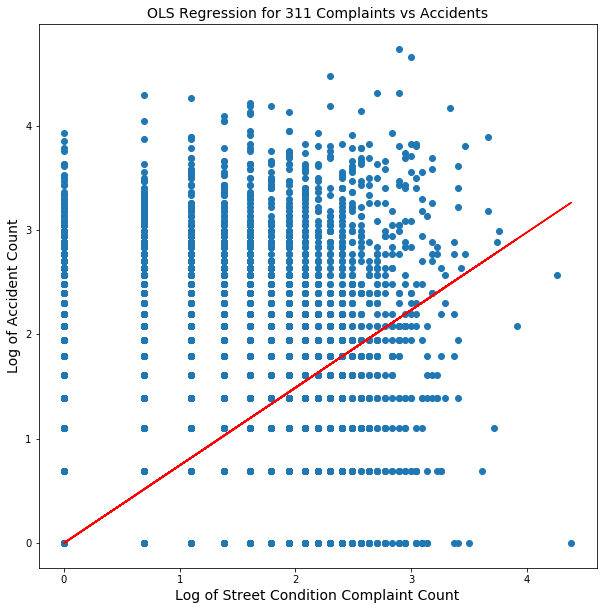

In [46]:
pl.figure(figsize=(10, 10))
pl.plot(dflog['Frequency_st_con'],dflog['FrequencyAcc'],'o')
pl.plot(log_Freq_st_con, ols3.predict(), '-r')
pl.ylabel('Log of Accident Count', fontsize = 14)
pl.xlabel('Log of Street Condition Complaint Count', fontsize = 14)
pl.title('OLS Regression for 311 Complaints vs Accidents',fontsize = 14)
savefig('ols.png')

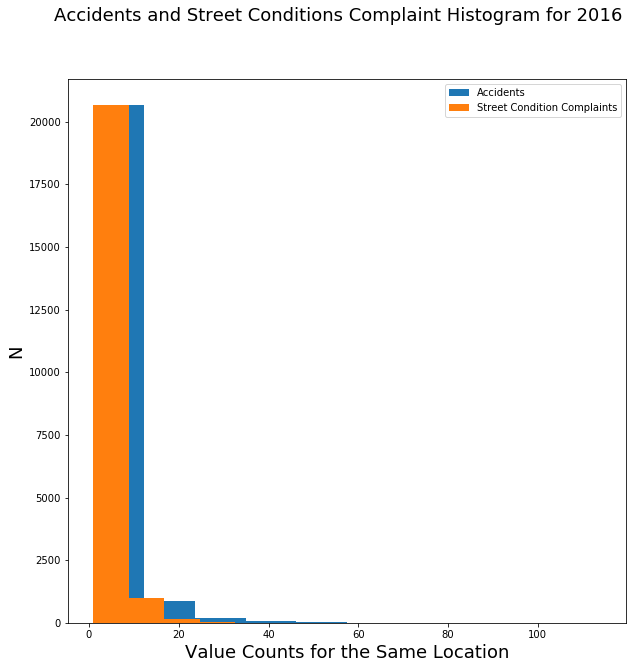

In [47]:
pl.figure(figsize=(10, 10))
pl.hist(dfpareto['FrequencyAcc'])
pl.hist(dfpareto['Frequency_st_con'])
pl.xlabel('Value Counts for the Same Location', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.suptitle('Accidents and Street Conditions Complaint Histogram for 2016', fontsize = 18)
pl.legend(['Accidents','Street Condition Complaints'])
savefig('hist.png')

In [48]:
print(dfpareto['FrequencyAcc'].mean(),dfpareto['Frequency_st_con'].mean())

(3.8739688359303392, 3.1472502291475712)


In [49]:
print(dfpareto['FrequencyAcc'].median(),dfpareto['Frequency_st_con'].median())

(2.0, 2.0)


In [50]:
print(np.std(dfpareto['FrequencyAcc']),np.std(dfpareto['Frequency_st_con']))

(5.428340837524976, 3.1623347966889317)


In [51]:
dfpareto.to_csv('VisionZero.csv')